In [ ]:
import pandas as pd
from google.colab import drive
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define file path
file_path1 = "/content/drive/My Drive/canopy.xlsx"
file_path2 = "/content/drive/My Drive/domain_properties.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install "dask[dataframe]"

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 5.0 MB/s eta 0:00:00


In [ ]:
# Read the Excel file into a DataFrame
canopy_df = pd.read_excel(file_path1)

# Display the first few rows to verify
canopy_df.head()

,Suburb Reference,Suburb (m2),2019 Canopy (m2),2019 Canopy %
0,ABBOTSBURY,4961070.0,1305410,26.31310
1,ABBOTSFORD,1016340.0,211744,20.83400
2,ACACIA GARDENS,984031.0,70460,7.16034
3,AGNES BANKS,16187100.0,3963650,24.48650
4,AIRDS,2409700.0,748092,31.04500


In [ ]:
# Read the Excel file into a DataFrame
prices_df = pd.read_csv(file_path2)

# Display the first few rows to verify
prices_df.head()

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/1/16,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/1/16,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


In [ ]:
# Convert date column to datetime format
prices_df['date_sold'] = pd.to_datetime(prices_df['date_sold'], format='%d/%m/%y')

# Filter for 2019
prices_df_2019 = prices_df[prices_df['date_sold'].dt.year == 2019]

# Display results
print("Filtered First Dataset:")
display(prices_df_2019.head())

Filtered First Dataset:


,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
3039,642000,2019-01-14,Wyoming,2,4,2,689,House,10134,29380,7.138,-33.40534,151.36250,32,1.5,154.2,52.93
3040,2150000,2019-01-15,Dulwich Hill,1,4,0,421,House,13715,47528,2.122,-33.90470,151.13884,32,1.5,154.2,7.90
3041,670000,2019-01-15,Granville,1,2,1,502,House,15332,26208,3.333,-33.83592,151.00745,20,1.5,154.2,19.01
3042,750000,2019-01-16,East Gosford,1,3,1,575,House,4238,31252,2.079,-33.43514,151.35463,15,1.5,154.2,49.55
3043,1850000,2019-01-17,Summer Hill,3,4,2,518,House,7311,51636,1.203,-33.89348,151.13720,29,1.5,154.2,7.42


In [ ]:
# Count the number of rows remaining
count_df1 = prices_df_2019.shape[0]
print(f"Rows remaining in first dataset: {count_df1}")

Rows remaining in first dataset: 1159


In [ ]:
# Check for missing values in each column
null_counts = prices_df_2019.isnull().sum()

# Display columns with null values
print("Null values per column:")
print(null_counts[null_counts > 0])

Null values per column:
Series([], dtype: int64)


In [ ]:
# List of unique suburbs in prices_df_2019
unique_suburbs = prices_df_2019['suburb'].unique()

# Display the unique suburbs
print("Unique suburbs in prices_df_2019:")
print(unique_suburbs)

Unique suburbs in prices_df_2019:
['Wyoming' 'Dulwich Hill' 'Granville' 'East Gosford' 'Summer Hill'
 'Watanobbi' 'Tascott' 'Currans Hill' 'Emu Plains' 'Ambarvale' 'Budgewoi'
 'Wagstaffe' 'Sandringham' 'East Killara' 'Queenscliff' 'Lindfield'
 'Lake Haven' 'Blackwall' 'Kirkham' 'Wadalba' 'Toowoon Bay' 'Kyle Bay'
 'Redfern' 'Five Dock' 'Alexandria' 'Glenmore Park' 'Northmead' 'Jannali'
 'Smithfield' 'Merrylands' 'East Lindfield' 'Asquith' 'Rouse Hill'
 'Bossley Park' 'Claremont Meadows' 'Willoughby' 'West Pennant Hills'
 'Miranda' 'Rosemeadow' 'Terrey Hills' 'Campbelltown' 'Malabar'
 'Bass Hill' 'Seven Hills' 'Homebush' 'Killcare' 'Denistone West'
 'Marayong' 'Kogarah' 'Port Hacking' 'Greenwich' 'Carss Park'
 'Spring Farm' 'Panania' 'Church Point' 'Quakers Hill' 'Colyton'
 'Charmhaven' 'Kingsford' 'Bondi' 'Bondi Junction' 'Warrimoo'
 'Forresters Beach' 'Fairlight' 'Dundas Valley' 'Carlingford' 'Waterloo'
 'Kogarah Bay' 'Coogee' 'Forestville' 'Surry Hills' 'Point Frederick'
 'Wareemba' '

In [ ]:
# List of unique suburbs in canopy_df
unique_suburbs = canopy_df['Suburb Reference'].unique()

# Display the unique suburbs
print("Unique suburbs in canopy_df:")
print(unique_suburbs)

Unique suburbs in canopy_df:
['ABBOTSBURY' 'ABBOTSFORD' 'ACACIA GARDENS' 'AGNES BANKS' 'AIRDS'
 'ALEXANDRIA' 'ALFORDS POINT' 'ALLAMBIE HEIGHTS' 'ALLAWAH' 'AMBARVALE'
 'ANNANDALE' 'ANNANGROVE' 'APPIN' 'ARCADIA' 'ARNCLIFFE' 'ARNDELL PARK'
 'ARTARMON' 'ASHBURY' 'ASHCROFT' 'ASHFIELD' 'ASQUITH' 'AUBURN' 'AUSTRAL'
 'AVALON BEACH' 'BADGERYS CREEK' 'BALGOWLAH' 'BALGOWLAH HEIGHTS' 'BALMAIN'
 'BALMAIN EAST' 'BANGOR' 'BANKSIA' 'BANKSMEADOW' 'BANKSTOWN'
 'BANKSTOWN AERODROME' 'BARANGAROO' 'BARDEN RIDGE' 'BARDIA'
 'BARDWELL PARK' 'BARDWELL VALLEY' 'BARGO' 'BASS HILL' 'BAULKHAM HILLS'
 'BAYVIEW' 'BEACON HILL' 'BEACONSFIELD' 'BEAUMONT HILLS' 'BEECROFT'
 'BELFIELD' 'BELIMBLA PARK' 'BELL' 'BELLA VISTA' 'BELLEVUE HILL' 'BELMORE'
 'BELROSE' 'BERALA' 'BERAMBING' 'BERKSHIRE PARK' 'BEROWRA' 'BEROWRA CREEK'
 'BEROWRA HEIGHTS' 'BEROWRA WATERS' 'BERRILEE' 'BEVERLEY PARK'
 'BEVERLY HILLS' 'BEXLEY' 'BEXLEY NORTH' 'BICKLEY VALE' 'BIDWILL'
 'BILGOLA BEACH' 'BILGOLA PLATEAU' 'BILPIN' 'BIRCHGROVE' 'BIRRONG'
 'BLACKE

In [ ]:
# Convert 'suburb' column to lowercase
prices_df_2019['suburb'] = prices_df_2019['suburb'].str.lower()
canopy_df['Suburb Reference'] = canopy_df['Suburb Reference'].str.lower()

# Verify the change by displaying the first few rows
print(prices_df_2019[['suburb']].head())
print(canopy_df[['Suburb Reference']].head())

            suburb
3039       wyoming
3040  dulwich hill
3041     granville
3042  east gosford
3043   summer hill
  Suburb Reference
0       abbotsbury
1       abbotsford
2   acacia gardens
3      agnes banks
4            airds


<ipython-input-14-f6ea6a79add3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_df_2019['suburb'] = prices_df_2019['suburb'].str.lower()


In [ ]:
# Merge datasets on suburb columns
merged_df = prices_df_2019.merge(canopy_df, left_on='suburb', right_on='Suburb Reference', how='inner')

# Display first few rows
print("Merged Dataset:")
display(merged_df.head())

# Check row count after merging
print(f"Total rows in merged dataset: {merged_df.shape[0]}")

Merged Dataset:


,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,...,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,Suburb Reference,Suburb (m2),2019 Canopy (m2),2019 Canopy %
0,2150000,2019-01-15,dulwich hill,1,4,0,421,House,13715,47528,...,-33.90470,151.13884,32,1.5,154.2,7.90,dulwich hill,2080700.0,386780,18.5889
1,670000,2019-01-15,granville,1,2,1,502,House,15332,26208,...,-33.83592,151.00745,20,1.5,154.2,19.01,granville,3289340.0,374568,11.3873
2,1850000,2019-01-17,summer hill,3,4,2,518,House,7311,51636,...,-33.89348,151.13720,29,1.5,154.2,7.42,summer hill,1212760.0,257740,21.2523
3,660000,2019-01-21,granville,2,5,2,426,House,15332,26208,...,-33.83592,151.00745,20,1.5,154.2,19.01,granville,3289340.0,374568,11.3873
4,655000,2019-01-21,currans hill,1,4,1,508,House,5309,42276,...,-34.04634,150.77377,115,1.5,154.2,45.05,currans hill,3596400.0,301684,8.3885


Total rows in merged dataset: 1000


In [ ]:
# Drop columns
columns_to_drop = ['suburb_lat', 'suburb_lng', 'suburb_elevation', 'cash_rate', 'property_inflation_index', 'Suburb Reference']  # List of columns to drop
merged_df = merged_df.drop(columns=columns_to_drop)

In [ ]:
merged_df['year_sold'] = merged_df['date_sold'].dt.year
merged_df['month_sold'] = merged_df['date_sold'].dt.month
merged_df['day_sold'] = merged_df['date_sold'].dt.day

# Drop the original datetime column
merged_df_numeric = merged_df.drop(columns=['date_sold'], errors='ignore')

# Remove white spaces
merged_df_numeric.columns = merged_df_numeric.columns.str.replace(" ", "_")

In [ ]:
display(merged_df_numeric.head())

,price,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,km_from_cbd,Suburb_(m2),2019_Canopy_(m2),2019_Canopy_%,year_sold,month_sold,day_sold
0,2150000,dulwich hill,1,4,0,421,House,13715,47528,2.122,7.90,2080700.0,386780,18.5889,2019,1,15
1,670000,granville,1,2,1,502,House,15332,26208,3.333,19.01,3289340.0,374568,11.3873,2019,1,15
2,1850000,summer hill,3,4,2,518,House,7311,51636,1.203,7.42,1212760.0,257740,21.2523,2019,1,17
3,660000,granville,2,5,2,426,House,15332,26208,3.333,19.01,3289340.0,374568,11.3873,2019,1,21
4,655000,currans hill,1,4,1,508,House,5309,42276,3.608,45.05,3596400.0,301684,8.3885,2019,1,21


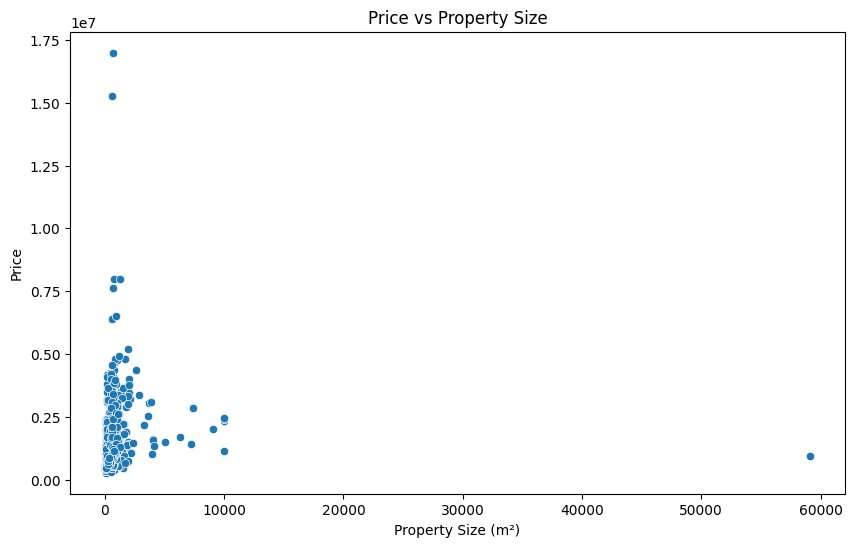

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_numeric, x='property_size', y='price')
plt.title('Price vs Property Size')
plt.xlabel('Property Size (m²)')
plt.ylabel('Price')
plt.show()


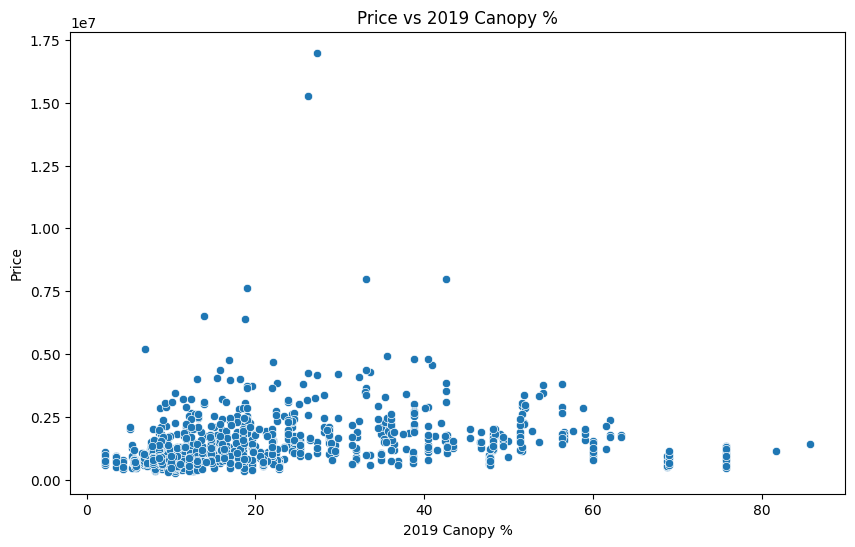

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_numeric, x='2019_Canopy_%', y='price')
plt.title('Price vs 2019 Canopy %')
plt.xlabel('2019 Canopy %')
plt.ylabel('Price')
plt.show()


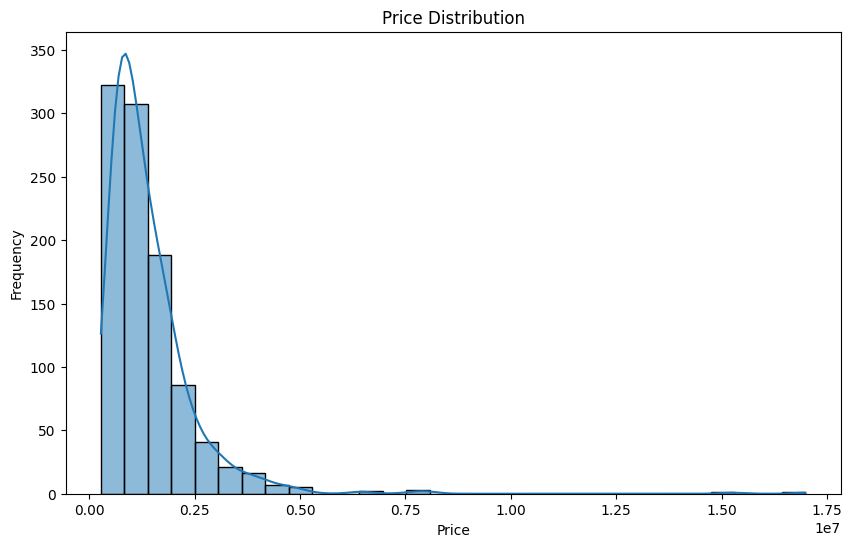

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_numeric['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

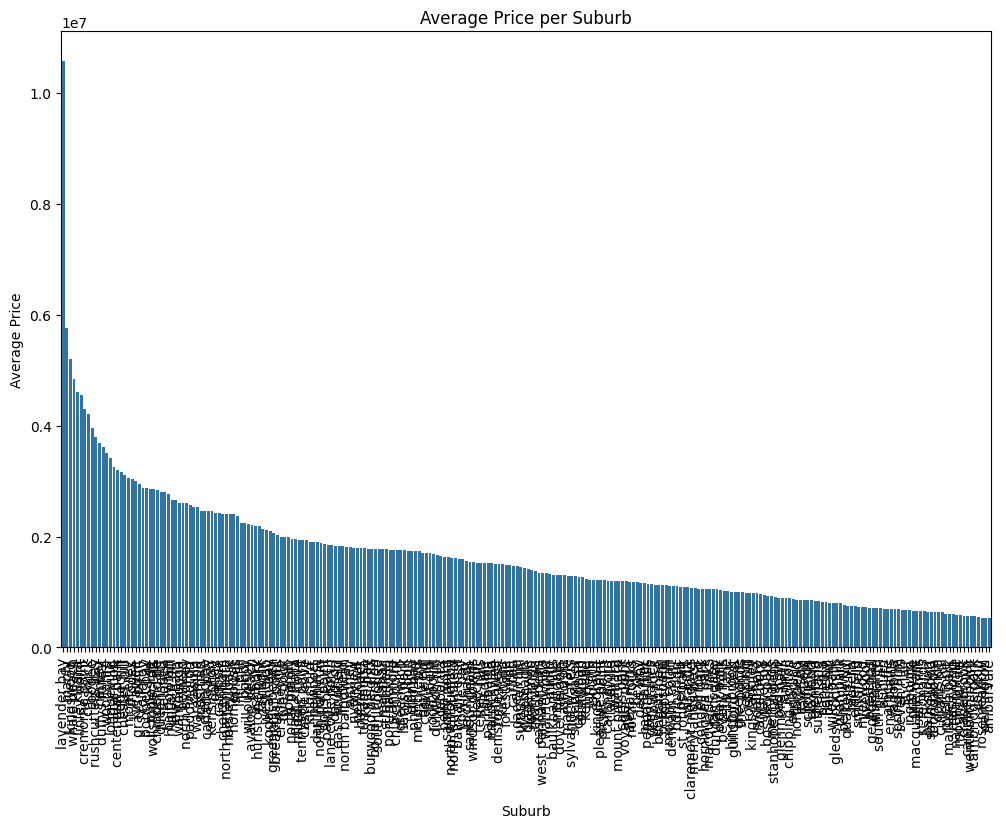

In [ ]:
avg_price_suburb = merged_df_numeric.groupby('suburb')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_suburb.index, y=avg_price_suburb.values)
plt.title('Average Price per Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

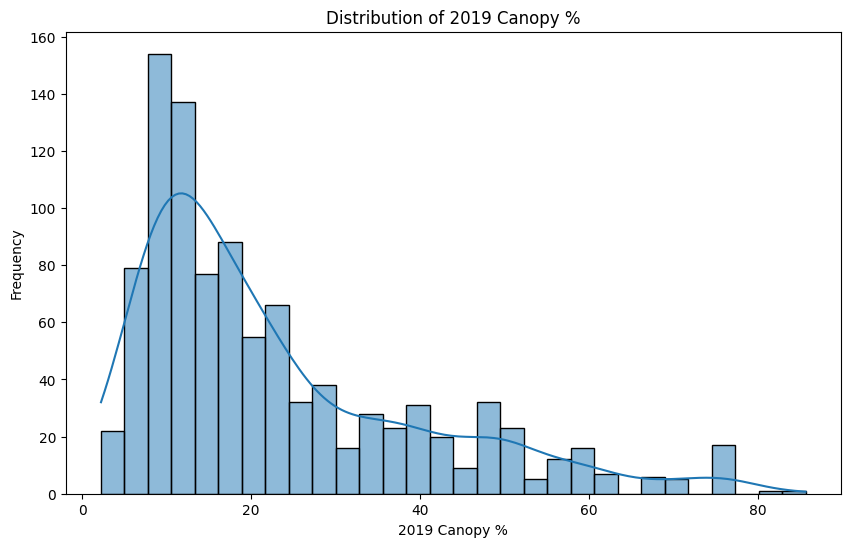

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_numeric['2019_Canopy_%'], bins=30, kde=True)
plt.title('Distribution of 2019 Canopy %')
plt.xlabel('2019 Canopy %')
plt.ylabel('Frequency')
plt.show()


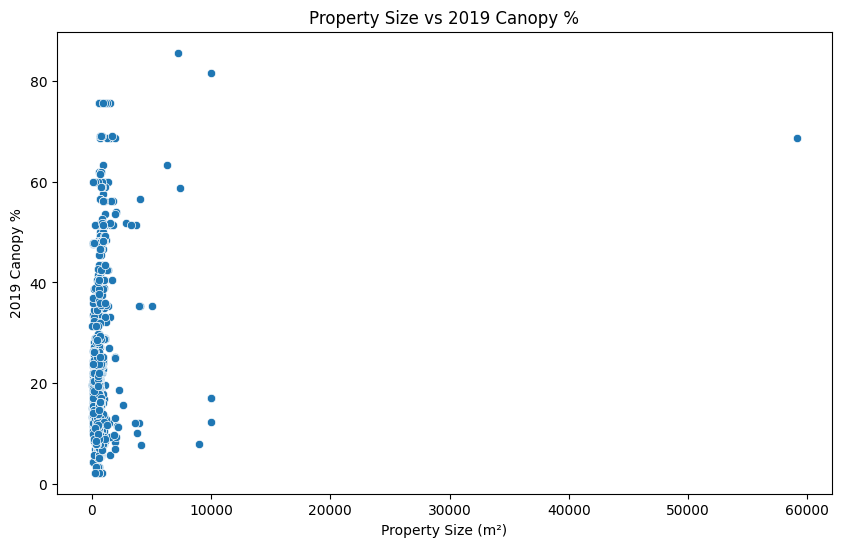

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_numeric, x='property_size', y='2019_Canopy_%')
plt.title('Property Size vs 2019 Canopy %')
plt.xlabel('Property Size (m²)')
plt.ylabel('2019 Canopy %')
plt.show()


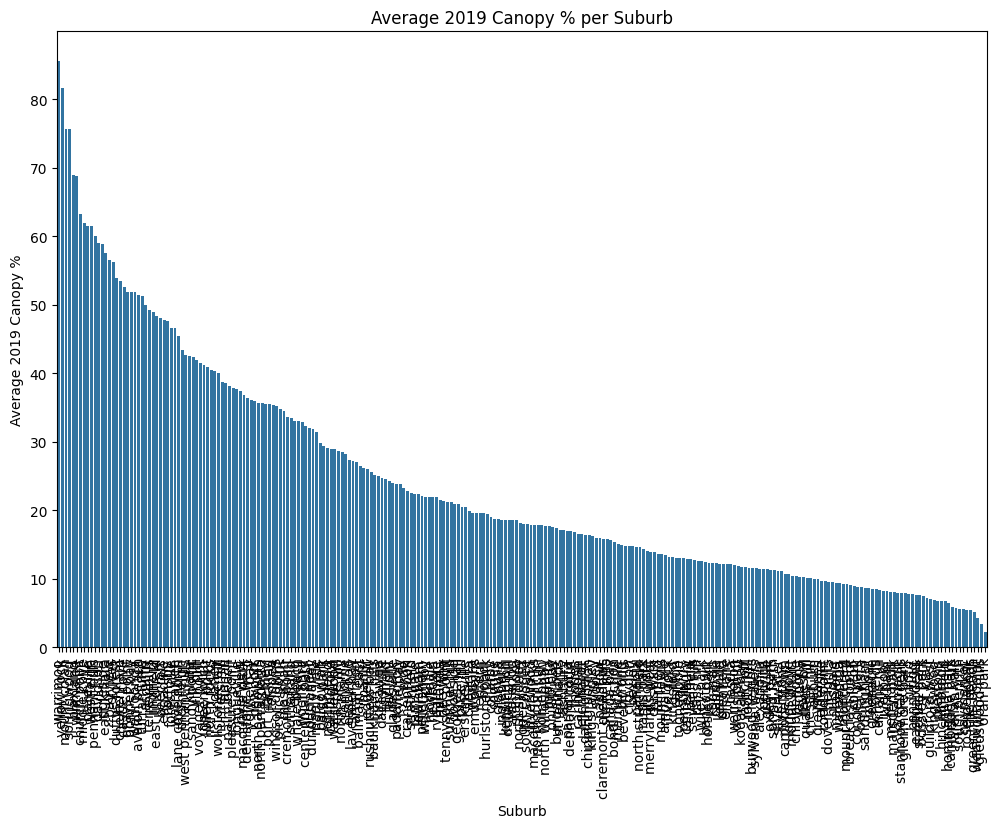

In [ ]:
avg_canopy_suburb = merged_df_numeric.groupby('suburb')['2019_Canopy_%'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_canopy_suburb.index, y=avg_canopy_suburb.values)
plt.title('Average 2019 Canopy % per Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average 2019 Canopy %')
plt.xticks(rotation=90)
plt.show()

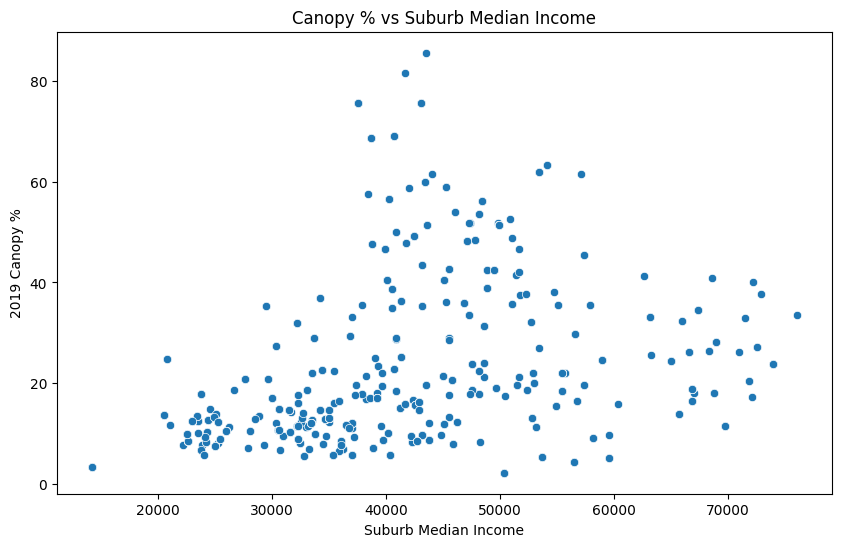

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_numeric, x='suburb_median_income', y='2019_Canopy_%')
plt.title('Canopy % vs Suburb Median Income')
plt.xlabel('Suburb Median Income')
plt.ylabel('2019 Canopy %')
plt.show()


### Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select features and target variable
X = merged_df_numeric[['2019_Canopy_%']]  # Feature
y = merged_df_numeric['price']  # Target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 573400.3891083233
R² Score: 0.06235445231759107


### Multiple Linear Regression

In [ ]:
X = merged_df_numeric[['2019_Canopy_%', 'property_size', 'suburb_population', 'km_from_cbd']]
y = merged_df_numeric['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 595659.1264383632
R² Score: -1.6759947914173243


Previous two models doing terribly. Checking feature importance

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
merged_df_numeric['suburb'] = label_enc.fit_transform(merged_df['suburb'])
merged_df_numeric['type'] = label_enc.fit_transform(merged_df['type'])

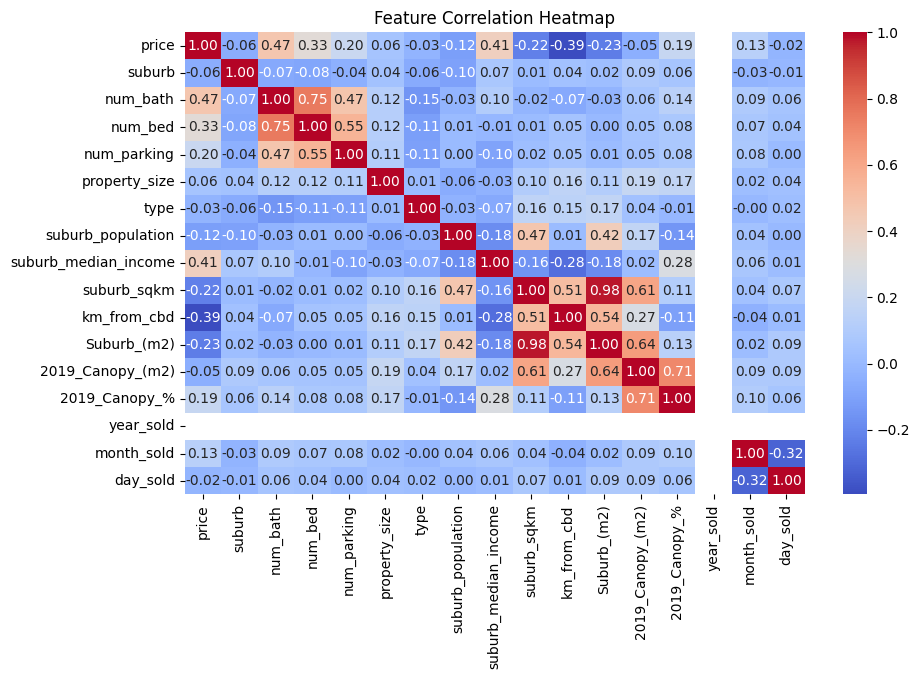

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(merged_df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### LightGBM

In [ ]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Define features X and y
X = merged_df_numeric.drop(columns=['price'])
y = merged_df_numeric['price']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to LightGBM dataset format
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test)

# Define optimized model parameters
params = {
    'objective': 'regression',
    'metric': 'mae',  # Mean Absolute Error
    'boosting_type': 'gbdt',
    'num_leaves': 50,             # Increase leaves for more flexibility
    'learning_rate': 0.03,        # Lower learning rate for better convergence
    'max_depth': 10,              # Restrict depth to prevent overfitting
    'lambda_l1': 0.1,             # L1 regularization
    'lambda_l2': 0.2,             # L2 regularization
    'feature_fraction': 0.8,      # Use 80% of features per tree
    'bagging_fraction': 0.8,      # Use 80% of data per tree
    'bagging_freq': 5,            # Perform bagging every 5 iterations
    'verbose': -1
}

# Train LightGBM model with Early Stopping using callbacks
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,  # Increased boosting rounds
    valid_sets=[valid_data],  # Validation set
    callbacks=[
        lgb.early_stopping(50),   # Stop if no improvement in 50 rounds
        lgb.log_evaluation(100)   # Log progress every 100 rounds
    ]
)

# Predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Mean Absolute Error: {mae:.2f}")
print(f"✅ R² Score: {r2:.4f}")


Training until validation scores don't improve for 50 rounds
[100]	valid_0's l1: 291710
[200]	valid_0's l1: 289718
Early stopping, best iteration is:
[153]	valid_0's l1: 286625
✅ Mean Absolute Error: 286625.10
✅ R² Score: 0.6219


In [ ]:
display(merged_df_numeric.head())

,price,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,km_from_cbd,Suburb_(m2),2019_Canopy_(m2),2019_Canopy_%,year_sold,month_sold,day_sold
0,2150000,73,1,4,0,421,5,13715,47528,2.122,7.90,2080700.0,386780,18.5889,2019,1,15
1,670000,95,1,2,1,502,5,15332,26208,3.333,19.01,3289340.0,374568,11.3873,2019,1,15
2,1850000,221,3,4,2,518,5,7311,51636,1.203,7.42,1212760.0,257740,21.2523,2019,1,17
3,660000,95,2,5,2,426,5,15332,26208,3.333,19.01,3289340.0,374568,11.3873,2019,1,21
4,655000,62,1,4,1,508,5,5309,42276,3.608,45.05,3596400.0,301684,8.3885,2019,1,21


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.2 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Define features and target
X = merged_df_numeric.drop(columns=['price'])
y = merged_df_numeric['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna optimization function
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'mae',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 1.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 1.0),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 200),
        'max_bin': trial.suggest_int('max_bin', 100, 500),
        'verbose': -1
    }

    # Convert to LightGBM dataset format
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

    # Train model
    model = lgb.train(
        params,
        train_data,
        num_boost_round=2000,  # ⬆️ Increased boosting rounds
        valid_sets=[valid_data],
        callbacks=[lgb.early_stopping(100)],  # ⬆️ More patience
    )

    # Predict and evaluate
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    mae = mean_absolute_error(y_test, y_pred)

    return mae  # Minimize MAE

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)  # ⬆️ More trials for better tuning

# Print best parameters
print("Best parameters:", study.best_params)

# Train final model with best parameters
best_params = study.best_params
best_params['objective'] = 'regression'
best_params['metric'] = 'mae'
best_params['boosting_type'] = 'gbdt'
best_params['verbose'] = -1

# Convert to LightGBM dataset format again
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

final_model = lgb.train(
    best_params,
    train_data,
    num_boost_round=2000,  # ⬆️ More boosting rounds
    valid_sets=[valid_data],
    callbacks=[lgb.early_stopping(100)]
)

# Predictions
y_pred_final = final_model.predict(X_test, num_iteration=final_model.best_iteration)

# Final evaluation
mae_final = mean_absolute_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print(f"✅ Final Mean Absolute Error: {mae_final:.2f}")
print(f"✅ Final R² Score: {r2_final:.4f}")


[I 2025-02-18 03:28:29,877] A new study created in memory with name: no-name-b847fa95-03a3-44c4-a152-69414edd824d


Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:30,462] Trial 0 finished with value: 287938.0474769181 and parameters: {'num_leaves': 250, 'learning_rate': 0.026036308088944148, 'max_depth': 18, 'lambda_l1': 0.07196341675867568, 'lambda_l2': 0.9352208306916151, 'feature_fraction': 0.5862251441506457, 'bagging_fraction': 0.6067655517480067, 'bagging_freq': 1, 'min_data_in_leaf': 17, 'max_bin': 166}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[218]	valid_0's l1: 287938
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:30,659] Trial 1 finished with value: 321279.1815549311 and parameters: {'num_leaves': 110, 'learning_rate': 0.04295142315116107, 'max_depth': 10, 'lambda_l1': 0.7330842071183069, 'lambda_l2': 0.4517172747610215, 'feature_fraction': 0.9813775909429194, 'bagging_fraction': 0.6565561885482423, 'bagging_freq': 1, 'min_data_in_leaf': 63, 'max_bin': 143}. Best is trial 0 with value: 287938.0474769181.
[I 2025-02-18 03:28:30,755] Trial 2 finished with value: 387454.18341093586 and parameters: {'num_leaves': 113, 'learning_rate': 0.07470184965664042, 'max_depth': 3, 'lambda_l1': 0.17530732777169544, 'lambda_l2': 0.0430105015446296, 'feature_fraction': 0.946440429888744, 'bagging_fraction': 0.8339882378478081, 'bagging_freq': 7, 'min_data_in_leaf': 200, 'max_bin': 448}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[107]	valid_0's l1: 321279
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[63]	valid_0's l1: 387454
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:30,997] Trial 3 finished with value: 312739.1504285613 and parameters: {'num_leaves': 250, 'learning_rate': 0.027660434233678192, 'max_depth': 13, 'lambda_l1': 0.5362419879315636, 'lambda_l2': 0.8055829467022335, 'feature_fraction': 0.9033075959051092, 'bagging_fraction': 0.7775777493425622, 'bagging_freq': 1, 'min_data_in_leaf': 56, 'max_bin': 269}. Best is trial 0 with value: 287938.0474769181.
[I 2025-02-18 03:28:31,056] Trial 4 finished with value: 369580.3450589438 and parameters: {'num_leaves': 278, 'learning_rate': 0.04647306476947042, 'max_depth': 4, 'lambda_l1': 0.580602900765313, 'lambda_l2': 0.6503142298624246, 'feature_fraction': 0.7328548934569726, 'bagging_fraction': 0.974035418509183, 'bagging_freq': 7, 'min_data_in_leaf': 139, 'max_bin': 474}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[155]	valid_0's l1: 312739
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[87]	valid_0's l1: 369580
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:31,245] Trial 5 finished with value: 317588.94605268445 and parameters: {'num_leaves': 102, 'learning_rate': 0.06832677246353472, 'max_depth': 7, 'lambda_l1': 0.7691855025471568, 'lambda_l2': 0.42874764913863705, 'feature_fraction': 0.8320353253578656, 'bagging_fraction': 0.5806167660466357, 'bagging_freq': 8, 'min_data_in_leaf': 44, 'max_bin': 209}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[144]	valid_0's l1: 317589
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[30]	valid_0's l1: 368306


[I 2025-02-18 03:28:31,422] Trial 6 finished with value: 368305.60723651067 and parameters: {'num_leaves': 258, 'learning_rate': 0.091129793857949, 'max_depth': 15, 'lambda_l1': 0.2037872708952725, 'lambda_l2': 0.6230791722904274, 'feature_fraction': 0.6531106834934217, 'bagging_fraction': 0.5510671585307434, 'bagging_freq': 5, 'min_data_in_leaf': 81, 'max_bin': 147}. Best is trial 0 with value: 287938.0474769181.
[I 2025-02-18 03:28:31,495] Trial 7 finished with value: 371200.76552707196 and parameters: {'num_leaves': 98, 'learning_rate': 0.0751449096623483, 'max_depth': 11, 'lambda_l1': 0.7105763318011207, 'lambda_l2': 0.061761113550444446, 'feature_fraction': 0.6228506540313221, 'bagging_fraction': 0.7022608825518162, 'bagging_freq': 5, 'min_data_in_leaf': 125, 'max_bin': 406}. Best is trial 0 with value: 287938.0474769181.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[43]	valid_0's l1: 371201
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:31,702] Trial 8 finished with value: 369914.95698821015 and parameters: {'num_leaves': 66, 'learning_rate': 0.09916063283570224, 'max_depth': 15, 'lambda_l1': 0.0044360820622483255, 'lambda_l2': 0.009434374349843955, 'feature_fraction': 0.8989998001690421, 'bagging_fraction': 0.6247235531859583, 'bagging_freq': 3, 'min_data_in_leaf': 137, 'max_bin': 178}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[272]	valid_0's l1: 369915
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:32,760] Trial 9 finished with value: 363122.6517216221 and parameters: {'num_leaves': 255, 'learning_rate': 0.010371865998966402, 'max_depth': 18, 'lambda_l1': 0.3959302799489096, 'lambda_l2': 0.7326484098805576, 'feature_fraction': 0.86642342197104, 'bagging_fraction': 0.6561885359014221, 'bagging_freq': 10, 'min_data_in_leaf': 90, 'max_bin': 140}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[420]	valid_0's l1: 363123
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:34,998] Trial 10 finished with value: 296273.9606310192 and parameters: {'num_leaves': 191, 'learning_rate': 0.008229634546301372, 'max_depth': 20, 'lambda_l1': 0.959561518260615, 'lambda_l2': 0.9682891299187874, 'feature_fraction': 0.4457999921561198, 'bagging_fraction': 0.41463063009511386, 'bagging_freq': 3, 'min_data_in_leaf': 17, 'max_bin': 333}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[488]	valid_0's l1: 296274
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:40,149] Trial 11 finished with value: 298076.3042763914 and parameters: {'num_leaves': 182, 'learning_rate': 0.005148350802697637, 'max_depth': 20, 'lambda_l1': 0.967894033668303, 'lambda_l2': 0.9980430240994903, 'feature_fraction': 0.4055363379933779, 'bagging_fraction': 0.4291355837508989, 'bagging_freq': 3, 'min_data_in_leaf': 11, 'max_bin': 347}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[642]	valid_0's l1: 298076
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:42,003] Trial 12 finished with value: 296691.54141152115 and parameters: {'num_leaves': 187, 'learning_rate': 0.023757285117883973, 'max_depth': 20, 'lambda_l1': 0.91047477664849, 'lambda_l2': 0.9838357608086217, 'feature_fraction': 0.48063933710336704, 'bagging_fraction': 0.40211746792807396, 'bagging_freq': 3, 'min_data_in_leaf': 13, 'max_bin': 287}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[195]	valid_0's l1: 296692
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:43,228] Trial 13 finished with value: 309890.44574924855 and parameters: {'num_leaves': 226, 'learning_rate': 0.024492608853430204, 'max_depth': 17, 'lambda_l1': 0.38743951688969513, 'lambda_l2': 0.8643268825590127, 'feature_fraction': 0.5429462562245766, 'bagging_fraction': 0.47578375422237634, 'bagging_freq': 2, 'min_data_in_leaf': 33, 'max_bin': 350}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[146]	valid_0's l1: 309890
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:44,096] Trial 14 finished with value: 298982.69170525233 and parameters: {'num_leaves': 206, 'learning_rate': 0.03648432013719735, 'max_depth': 17, 'lambda_l1': 0.17103643731038892, 'lambda_l2': 0.25999104885231183, 'feature_fraction': 0.5289014370931124, 'bagging_fraction': 0.501475800300551, 'bagging_freq': 4, 'min_data_in_leaf': 31, 'max_bin': 227}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[141]	valid_0's l1: 298983
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:44,483] Trial 15 finished with value: 375689.7978682452 and parameters: {'num_leaves': 141, 'learning_rate': 0.016059878091899665, 'max_depth': 20, 'lambda_l1': 0.01589812235801802, 'lambda_l2': 0.8915927955556302, 'feature_fraction': 0.4144382318903391, 'bagging_fraction': 0.758767702825549, 'bagging_freq': 1, 'min_data_in_leaf': 177, 'max_bin': 357}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[250]	valid_0's l1: 375690
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:45,478] Trial 16 finished with value: 358985.9557778436 and parameters: {'num_leaves': 29, 'learning_rate': 0.05898379367790609, 'max_depth': 14, 'lambda_l1': 0.39594789698914157, 'lambda_l2': 0.583739023931281, 'feature_fraction': 0.7536033615031065, 'bagging_fraction': 0.5302581419834138, 'bagging_freq': 2, 'min_data_in_leaf': 74, 'max_bin': 254}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[122]	valid_0's l1: 358986
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:46,374] Trial 17 finished with value: 339964.56083642243 and parameters: {'num_leaves': 156, 'learning_rate': 0.03532383792395088, 'max_depth': 18, 'lambda_l1': 0.8580046052548371, 'lambda_l2': 0.7419970091892962, 'feature_fraction': 0.5886208795081169, 'bagging_fraction': 0.9699469965150825, 'bagging_freq': 4, 'min_data_in_leaf': 105, 'max_bin': 319}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[430]	valid_0's l1: 339965
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:47,905] Trial 18 finished with value: 303492.25832760264 and parameters: {'num_leaves': 292, 'learning_rate': 0.014495029711985775, 'max_depth': 9, 'lambda_l1': 0.6289730235079252, 'lambda_l2': 0.2872461836226302, 'feature_fraction': 0.4866284000450633, 'bagging_fraction': 0.8815739790823041, 'bagging_freq': 2, 'min_data_in_leaf': 28, 'max_bin': 411}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[403]	valid_0's l1: 303492
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:48,875] Trial 19 finished with value: 327871.71699653665 and parameters: {'num_leaves': 208, 'learning_rate': 0.019111302508834242, 'max_depth': 16, 'lambda_l1': 0.2917917228995548, 'lambda_l2': 0.921838718209632, 'feature_fraction': 0.6849941296038702, 'bagging_fraction': 0.45307527336609144, 'bagging_freq': 4, 'min_data_in_leaf': 45, 'max_bin': 210}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[243]	valid_0's l1: 327872
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:54,433] Trial 20 finished with value: 298117.0926919527 and parameters: {'num_leaves': 231, 'learning_rate': 0.03257761783675397, 'max_depth': 13, 'lambda_l1': 0.49368129547029516, 'lambda_l2': 0.7684817409035622, 'feature_fraction': 0.4627104697492401, 'bagging_fraction': 0.6021384252391958, 'bagging_freq': 6, 'min_data_in_leaf': 13, 'max_bin': 114}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[269]	valid_0's l1: 298117
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:56,143] Trial 21 finished with value: 295816.22284884396 and parameters: {'num_leaves': 177, 'learning_rate': 0.02304569351966764, 'max_depth': 20, 'lambda_l1': 0.9969078414797203, 'lambda_l2': 0.9932385615343523, 'feature_fraction': 0.5579836146869437, 'bagging_fraction': 0.4010653577819432, 'bagging_freq': 3, 'min_data_in_leaf': 14, 'max_bin': 297}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[219]	valid_0's l1: 295816
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:57,767] Trial 22 finished with value: 302653.0228482061 and parameters: {'num_leaves': 173, 'learning_rate': 0.005435557317374198, 'max_depth': 19, 'lambda_l1': 0.9938437484040032, 'lambda_l2': 0.9998453513187348, 'feature_fraction': 0.5690796542898627, 'bagging_fraction': 0.4087141079140666, 'bagging_freq': 2, 'min_data_in_leaf': 29, 'max_bin': 321}. Best is trial 0 with value: 287938.0474769181.
[I 2025-02-18 03:28:57,916] Trial 23 finished with value: 330089.7020004688 and parameters: {'num_leaves': 141, 'learning_rate': 0.05112113065817086, 'max_depth': 18, 'lambda_l1': 0.8514766339483504, 'lambda_l2': 0.8394391205842687, 'feature_fraction': 0.5272944718191687, 'bagging_fraction': 0.5012928923456466, 'bagging_freq': 3, 'min_data_in_leaf': 57, 'max_bin': 386}. Best is trial 0 with value: 287938.0474769181.


Early stopping, best iteration is:
[798]	valid_0's l1: 302653
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[183]	valid_0's l1: 330090


[I 2025-02-18 03:28:58,058] Trial 24 finished with value: 330261.30491323303 and parameters: {'num_leaves': 207, 'learning_rate': 0.02054201762370507, 'max_depth': 20, 'lambda_l1': 0.8042444500201512, 'lambda_l2': 0.9105290255407062, 'feature_fraction': 0.5929039821537709, 'bagging_fraction': 0.46279352434818444, 'bagging_freq': 1, 'min_data_in_leaf': 45, 'max_bin': 249}. Best is trial 0 with value: 287938.0474769181.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[214]	valid_0's l1: 330261
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:58,490] Trial 25 finished with value: 267080.44819504686 and parameters: {'num_leaves': 231, 'learning_rate': 0.028421112118172574, 'max_depth': 16, 'lambda_l1': 0.6551416771173293, 'lambda_l2': 0.7119490762005187, 'feature_fraction': 0.6409788306457047, 'bagging_fraction': 0.5495495125476224, 'bagging_freq': 4, 'min_data_in_leaf': 11, 'max_bin': 102}. Best is trial 25 with value: 267080.44819504686.


Early stopping, best iteration is:
[396]	valid_0's l1: 267080
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:58,678] Trial 26 finished with value: 291191.06877334026 and parameters: {'num_leaves': 234, 'learning_rate': 0.041556362323547896, 'max_depth': 16, 'lambda_l1': 0.6591025734134323, 'lambda_l2': 0.6934215769129337, 'feature_fraction': 0.6478327945022215, 'bagging_fraction': 0.5443782114574415, 'bagging_freq': 5, 'min_data_in_leaf': 24, 'max_bin': 118}. Best is trial 25 with value: 267080.44819504686.
[I 2025-02-18 03:28:58,802] Trial 27 finished with value: 343781.4731719417 and parameters: {'num_leaves': 298, 'learning_rate': 0.056209450577248, 'max_depth': 16, 'lambda_l1': 0.6679255991167495, 'lambda_l2': 0.5494836932201389, 'feature_fraction': 0.7870169121377446, 'bagging_fraction': 0.5597724044857318, 'bagging_freq': 6, 'min_data_in_leaf': 71, 'max_bin': 121}. Best is trial 25 with value: 267080.44819504686.


Early stopping, best iteration is:
[160]	valid_0's l1: 291191
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[188]	valid_0's l1: 343781


[I 2025-02-18 03:28:58,913] Trial 28 finished with value: 367963.23151755414 and parameters: {'num_leaves': 235, 'learning_rate': 0.04486857445554464, 'max_depth': 13, 'lambda_l1': 0.46083781383053507, 'lambda_l2': 0.6852834440898958, 'feature_fraction': 0.6749424508112112, 'bagging_fraction': 0.7036320692378748, 'bagging_freq': 9, 'min_data_in_leaf': 98, 'max_bin': 189}. Best is trial 25 with value: 267080.44819504686.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[81]	valid_0's l1: 367963
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:59,100] Trial 29 finished with value: 320220.63160545164 and parameters: {'num_leaves': 274, 'learning_rate': 0.039333831622749435, 'max_depth': 10, 'lambda_l1': 0.5945943009271066, 'lambda_l2': 0.5240297707670803, 'feature_fraction': 0.6330532032788551, 'bagging_fraction': 0.6278127178003458, 'bagging_freq': 5, 'min_data_in_leaf': 60, 'max_bin': 161}. Best is trial 25 with value: 267080.44819504686.
[I 2025-02-18 03:28:59,265] Trial 30 finished with value: 299314.45379075577 and parameters: {'num_leaves': 222, 'learning_rate': 0.03122549458219799, 'max_depth': 15, 'lambda_l1': 0.6866467942207847, 'lambda_l2': 0.4536636070061584, 'feature_fraction': 0.7229187572224799, 'bagging_fraction': 0.6760424640571315, 'bagging_freq': 7, 'min_data_in_leaf': 35, 'max_bin': 163}. Best is trial 25 with value: 267080.44819504686.


Early stopping, best iteration is:
[290]	valid_0's l1: 320221
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[126]	valid_0's l1: 299314


[I 2025-02-18 03:28:59,431] Trial 31 finished with value: 297027.55558344105 and parameters: {'num_leaves': 242, 'learning_rate': 0.040491278217183777, 'max_depth': 17, 'lambda_l1': 0.09551053910565743, 'lambda_l2': 0.8094632345536888, 'feature_fraction': 0.6186570086374047, 'bagging_fraction': 0.5100263619496185, 'bagging_freq': 4, 'min_data_in_leaf': 22, 'max_bin': 102}. Best is trial 25 with value: 267080.44819504686.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[132]	valid_0's l1: 297028
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:28:59,981] Trial 32 finished with value: 266444.73355436185 and parameters: {'num_leaves': 272, 'learning_rate': 0.028383640644477386, 'max_depth': 18, 'lambda_l1': 0.7802381255506506, 'lambda_l2': 0.7071662967420645, 'feature_fraction': 0.5527333742476954, 'bagging_fraction': 0.5880252723470758, 'bagging_freq': 6, 'min_data_in_leaf': 10, 'max_bin': 128}. Best is trial 32 with value: 266444.73355436185.


Early stopping, best iteration is:
[426]	valid_0's l1: 266445
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:00,119] Trial 33 finished with value: 316009.3636177683 and parameters: {'num_leaves': 276, 'learning_rate': 0.049202075567708455, 'max_depth': 16, 'lambda_l1': 0.7533453519030666, 'lambda_l2': 0.6541359322870732, 'feature_fraction': 0.6610307103033496, 'bagging_fraction': 0.5846985139304712, 'bagging_freq': 6, 'min_data_in_leaf': 44, 'max_bin': 128}. Best is trial 32 with value: 266444.73355436185.


Early stopping, best iteration is:
[108]	valid_0's l1: 316009
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:00,685] Trial 34 finished with value: 302189.2606493763 and parameters: {'num_leaves': 264, 'learning_rate': 0.028542150641474633, 'max_depth': 18, 'lambda_l1': 0.5556550255928205, 'lambda_l2': 0.7421903493652007, 'feature_fraction': 0.9849878461273549, 'bagging_fraction': 0.7372762368374416, 'bagging_freq': 8, 'min_data_in_leaf': 26, 'max_bin': 104}. Best is trial 32 with value: 266444.73355436185.


Early stopping, best iteration is:
[150]	valid_0's l1: 302189
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:01,024] Trial 35 finished with value: 320045.09666933556 and parameters: {'num_leaves': 285, 'learning_rate': 0.041808330745875186, 'max_depth': 14, 'lambda_l1': 0.6474178982464543, 'lambda_l2': 0.36851777083859233, 'feature_fraction': 0.7167505035322801, 'bagging_fraction': 0.6278553316035519, 'bagging_freq': 6, 'min_data_in_leaf': 50, 'max_bin': 145}. Best is trial 32 with value: 266444.73355436185.
[I 2025-02-18 03:29:01,125] Trial 36 finished with value: 406298.2229220782 and parameters: {'num_leaves': 255, 'learning_rate': 0.02883390056575158, 'max_depth': 7, 'lambda_l1': 0.8055952218587229, 'lambda_l2': 0.6938044794907304, 'feature_fraction': 0.5052172464029994, 'bagging_fraction': 0.5457647497559346, 'bagging_freq': 8, 'min_data_in_leaf': 184, 'max_bin': 175}. Best is trial 32 with value: 266444.73355436185.


Early stopping, best iteration is:
[318]	valid_0's l1: 320045
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[144]	valid_0's l1: 406298
Training until validation scores don't improve for 100 rounds

[I 2025-02-18 03:29:01,241] Trial 37 finished with value: 384138.64624781185 and parameters: {'num_leaves': 245, 'learning_rate': 0.0576922077250944, 'max_depth': 14, 'lambda_l1': 0.7283280095926816, 'lambda_l2': 0.6056218405980464, 'feature_fraction': 0.7612966356369129, 'bagging_fraction': 0.5706404555350207, 'bagging_freq': 5, 'min_data_in_leaf': 120, 'max_bin': 201}. Best is trial 32 with value: 266444.73355436185.



Early stopping, best iteration is:
[182]	valid_0's l1: 384139
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:01,442] Trial 38 finished with value: 304124.67614185286 and parameters: {'num_leaves': 219, 'learning_rate': 0.03521293362816672, 'max_depth': 12, 'lambda_l1': 0.5111142991870691, 'lambda_l2': 0.8058885095761107, 'feature_fraction': 0.5917141540487816, 'bagging_fraction': 0.8157595751085119, 'bagging_freq': 7, 'min_data_in_leaf': 37, 'max_bin': 135}. Best is trial 32 with value: 266444.73355436185.
[I 2025-02-18 03:29:01,604] Trial 39 finished with value: 324617.70943463827 and parameters: {'num_leaves': 269, 'learning_rate': 0.06835591150601072, 'max_depth': 19, 'lambda_l1': 0.605730542285648, 'lambda_l2': 0.6925972850838275, 'feature_fraction': 0.6957731838104003, 'bagging_fraction': 0.6609902166002491, 'bagging_freq': 5, 'min_data_in_leaf': 66, 'max_bin': 159}. Best is trial 32 with value: 266444.73355436185.


Early stopping, best iteration is:
[175]	valid_0's l1: 304125
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[185]	valid_0's l1: 324618
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:01,974] Trial 40 finished with value: 289803.1652719113 and parameters: {'num_leaves': 299, 'learning_rate': 0.013597650183778981, 'max_depth': 16, 'lambda_l1': 0.315621664009041, 'lambda_l2': 0.4554740265332046, 'feature_fraction': 0.6507830222416782, 'bagging_fraction': 0.6037457212169353, 'bagging_freq': 7, 'min_data_in_leaf': 21, 'max_bin': 221}. Best is trial 32 with value: 266444.73355436185.


Early stopping, best iteration is:
[357]	valid_0's l1: 289803
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:02,278] Trial 41 finished with value: 291284.8693525541 and parameters: {'num_leaves': 290, 'learning_rate': 0.014805584698408642, 'max_depth': 16, 'lambda_l1': 0.24100239776616153, 'lambda_l2': 0.44328552341662497, 'feature_fraction': 0.6488082824106254, 'bagging_fraction': 0.5969570332933744, 'bagging_freq': 6, 'min_data_in_leaf': 22, 'max_bin': 119}. Best is trial 32 with value: 266444.73355436185.


Early stopping, best iteration is:
[348]	valid_0's l1: 291285
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:02,669] Trial 42 finished with value: 273428.5879148953 and parameters: {'num_leaves': 261, 'learning_rate': 0.02575414844804489, 'max_depth': 17, 'lambda_l1': 0.33767959053149027, 'lambda_l2': 0.31862277756024093, 'feature_fraction': 0.6303139317577955, 'bagging_fraction': 0.5213865512519053, 'bagging_freq': 7, 'min_data_in_leaf': 10, 'max_bin': 188}. Best is trial 32 with value: 266444.73355436185.


Early stopping, best iteration is:
[283]	valid_0's l1: 273429
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:03,450] Trial 43 finished with value: 271093.2410401633 and parameters: {'num_leaves': 263, 'learning_rate': 0.01237970850910278, 'max_depth': 19, 'lambda_l1': 0.30775886503639727, 'lambda_l2': 0.36599058651831906, 'feature_fraction': 0.6096414059869285, 'bagging_fraction': 0.6129586560716715, 'bagging_freq': 7, 'min_data_in_leaf': 10, 'max_bin': 227}. Best is trial 32 with value: 266444.73355436185.


Early stopping, best iteration is:
[525]	valid_0's l1: 271093
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:05,079] Trial 44 finished with value: 268025.6292326056 and parameters: {'num_leaves': 255, 'learning_rate': 0.025714075011407725, 'max_depth': 19, 'lambda_l1': 0.12772938602565806, 'lambda_l2': 0.24184148637154051, 'feature_fraction': 0.6137211731200026, 'bagging_fraction': 0.6420364731919518, 'bagging_freq': 9, 'min_data_in_leaf': 10, 'max_bin': 187}. Best is trial 32 with value: 266444.73355436185.


Early stopping, best iteration is:
[325]	valid_0's l1: 268026
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:07,575] Trial 45 finished with value: 265283.237937046 and parameters: {'num_leaves': 260, 'learning_rate': 0.010528630436906257, 'max_depth': 19, 'lambda_l1': 0.10875704923259011, 'lambda_l2': 0.1652406543977465, 'feature_fraction': 0.6176367522271141, 'bagging_fraction': 0.6423280660064821, 'bagging_freq': 10, 'min_data_in_leaf': 10, 'max_bin': 190}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[751]	valid_0's l1: 265283
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:07,946] Trial 46 finished with value: 294977.7667795339 and parameters: {'num_leaves': 248, 'learning_rate': 0.009311910413713601, 'max_depth': 19, 'lambda_l1': 0.11813133829082753, 'lambda_l2': 0.15595919610714848, 'feature_fraction': 0.6085789736485104, 'bagging_fraction': 0.7203985508426634, 'bagging_freq': 10, 'min_data_in_leaf': 37, 'max_bin': 233}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[620]	valid_0's l1: 294978
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:08,473] Trial 47 finished with value: 278996.64899882744 and parameters: {'num_leaves': 281, 'learning_rate': 0.01893329415566489, 'max_depth': 19, 'lambda_l1': 0.14692322419183787, 'lambda_l2': 0.17060819454807466, 'feature_fraction': 0.5741423954028729, 'bagging_fraction': 0.642953211708216, 'bagging_freq': 9, 'min_data_in_leaf': 11, 'max_bin': 276}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[361]	valid_0's l1: 278997
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:08,988] Trial 48 finished with value: 290704.70410999615 and parameters: {'num_leaves': 267, 'learning_rate': 0.01074172817746923, 'max_depth': 18, 'lambda_l1': 0.05855705509284914, 'lambda_l2': 0.15637624182815413, 'feature_fraction': 0.5476964213475836, 'bagging_fraction': 0.6750068458363311, 'bagging_freq': 9, 'min_data_in_leaf': 17, 'max_bin': 193}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[522]	valid_0's l1: 290705
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:09,147] Trial 49 finished with value: 361542.42374401813 and parameters: {'num_leaves': 200, 'learning_rate': 0.019038116264483568, 'max_depth': 3, 'lambda_l1': 0.26097921390290424, 'lambda_l2': 0.224999306619585, 'feature_fraction': 0.5039729536157609, 'bagging_fraction': 0.6933013646145438, 'bagging_freq': 10, 'min_data_in_leaf': 84, 'max_bin': 492}. Best is trial 45 with value: 265283.237937046.
[I 2025-02-18 03:29:09,288] Trial 50 finished with value: 330739.9129088169 and parameters: {'num_leaves': 252, 'learning_rate': 0.0830417152611829, 'max_depth': 19, 'lambda_l1': 0.18579009574393907, 'lambda_l2': 0.06662516354824088, 'feature_fraction': 0.6017916353034737, 'bagging_fraction': 0.6422044957476678, 'bagging_freq': 9, 'min_data_in_leaf': 50, 'max_bin': 243}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[320]	valid_0's l1: 361542
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[162]	valid_0's l1: 330740
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[271]	valid_0's l1: 292338


[I 2025-02-18 03:29:09,594] Trial 51 finished with value: 292338.3195050054 and parameters: {'num_leaves': 262, 'learning_rate': 0.02619166365832261, 'max_depth': 17, 'lambda_l1': 0.3352234172129947, 'lambda_l2': 0.36365678935054263, 'feature_fraction': 0.6261642927065758, 'bagging_fraction': 0.5262271162552963, 'bagging_freq': 8, 'min_data_in_leaf': 18, 'max_bin': 181}. Best is trial 45 with value: 265283.237937046.


Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:09,978] Trial 52 finished with value: 273697.035716576 and parameters: {'num_leaves': 240, 'learning_rate': 0.02327344384876645, 'max_depth': 18, 'lambda_l1': 0.22554345773193285, 'lambda_l2': 0.36571836800490126, 'feature_fraction': 0.6749443637725957, 'bagging_fraction': 0.5658611448910897, 'bagging_freq': 7, 'min_data_in_leaf': 10, 'max_bin': 152}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[217]	valid_0's l1: 273697
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:10,193] Trial 53 finished with value: 308777.98673683696 and parameters: {'num_leaves': 281, 'learning_rate': 0.011924055688117592, 'max_depth': 17, 'lambda_l1': 0.4381015088339114, 'lambda_l2': 0.3191902917763312, 'feature_fraction': 0.9516499686309472, 'bagging_fraction': 0.48353336693673066, 'bagging_freq': 8, 'min_data_in_leaf': 36, 'max_bin': 213}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[272]	valid_0's l1: 308778
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:10,590] Trial 54 finished with value: 276626.75408930046 and parameters: {'num_leaves': 256, 'learning_rate': 0.031246904440213455, 'max_depth': 19, 'lambda_l1': 0.03944324815287062, 'lambda_l2': 0.22215253414040748, 'feature_fraction': 0.5674036180532864, 'bagging_fraction': 0.6107304909136037, 'bagging_freq': 10, 'min_data_in_leaf': 10, 'max_bin': 173}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[230]	valid_0's l1: 276627
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:10,805] Trial 55 finished with value: 299859.68464142876 and parameters: {'num_leaves': 218, 'learning_rate': 0.016711997149588258, 'max_depth': 18, 'lambda_l1': 0.3552048039836019, 'lambda_l2': 0.0894571760806877, 'feature_fraction': 0.534663454282324, 'bagging_fraction': 0.570228186910424, 'bagging_freq': 9, 'min_data_in_leaf': 27, 'max_bin': 143}. Best is trial 45 with value: 265283.237937046.
[I 2025-02-18 03:29:10,911] Trial 56 finished with value: 386203.5283901555 and parameters: {'num_leaves': 74, 'learning_rate': 0.02598775206828015, 'max_depth': 15, 'lambda_l1': 0.14995927422535166, 'lambda_l2': 0.31222157456395755, 'feature_fraction': 0.6322066339582366, 'bagging_fraction': 0.5229931498621206, 'bagging_freq': 7, 'min_data_in_leaf': 147, 'max_bin': 199}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[279]	valid_0's l1: 299860
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[238]	valid_0's l1: 386204
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:11,318] Trial 57 finished with value: 293572.75638461555 and parameters: {'num_leaves': 270, 'learning_rate': 0.006586696530978086, 'max_depth': 20, 'lambda_l1': 0.2686250622191365, 'lambda_l2': 0.23113728647903997, 'feature_fraction': 0.6095435861645709, 'bagging_fraction': 0.44120497395677943, 'bagging_freq': 10, 'min_data_in_leaf': 17, 'max_bin': 265}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[606]	valid_0's l1: 293573
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:11,569] Trial 58 finished with value: 302309.90160433424 and parameters: {'num_leaves': 228, 'learning_rate': 0.02275885785079435, 'max_depth': 17, 'lambda_l1': 0.1070819428876934, 'lambda_l2': 0.4024015268543137, 'feature_fraction': 0.5144266823630573, 'bagging_fraction': 0.5894499798599583, 'bagging_freq': 8, 'min_data_in_leaf': 32, 'max_bin': 231}. Best is trial 45 with value: 265283.237937046.
[I 2025-02-18 03:29:11,703] Trial 59 finished with value: 317500.52060507925 and parameters: {'num_leaves': 261, 'learning_rate': 0.03706770145079315, 'max_depth': 5, 'lambda_l1': 0.21160146659366794, 'lambda_l2': 0.282388240639943, 'feature_fraction': 0.5804039515948692, 'bagging_fraction': 0.6530956148903889, 'bagging_freq': 7, 'min_data_in_leaf': 42, 'max_bin': 187}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[256]	valid_0's l1: 302310
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[91]	valid_0's l1: 317501
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:12,193] Trial 60 finished with value: 289333.8126616212 and parameters: {'num_leaves': 289, 'learning_rate': 0.01652737682146974, 'max_depth': 19, 'lambda_l1': 0.4308090961837068, 'lambda_l2': 0.10315320541973812, 'feature_fraction': 0.7079707870950137, 'bagging_fraction': 0.6147661967773357, 'bagging_freq': 6, 'min_data_in_leaf': 19, 'max_bin': 134}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[552]	valid_0's l1: 289334
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:12,521] Trial 61 finished with value: 279694.2527197953 and parameters: {'num_leaves': 239, 'learning_rate': 0.020733768957367848, 'max_depth': 18, 'lambda_l1': 0.24065365825427623, 'lambda_l2': 0.36807209777064354, 'feature_fraction': 0.6765231561819175, 'bagging_fraction': 0.5585157493667482, 'bagging_freq': 7, 'min_data_in_leaf': 12, 'max_bin': 153}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[217]	valid_0's l1: 279694
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:12,868] Trial 62 finished with value: 273118.44471876 and parameters: {'num_leaves': 248, 'learning_rate': 0.03259463808434346, 'max_depth': 18, 'lambda_l1': 0.21452626499517746, 'lambda_l2': 0.19902714523787898, 'feature_fraction': 0.6644937888062785, 'bagging_fraction': 0.48924760959850144, 'bagging_freq': 7, 'min_data_in_leaf': 10, 'max_bin': 173}. Best is trial 45 with value: 265283.237937046.
[I 2025-02-18 03:29:13,031] Trial 63 finished with value: 287400.81874221354 and parameters: {'num_leaves': 248, 'learning_rate': 0.03294155308729899, 'max_depth': 20, 'lambda_l1': 0.1522598550744823, 'lambda_l2': 0.1882270125498052, 'feature_fraction': 0.7352911619804248, 'bagging_fraction': 0.5338901635620262, 'bagging_freq': 6, 'min_data_in_leaf': 26, 'max_bin': 209}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[231]	valid_0's l1: 273118
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[108]	valid_0's l1: 287401


[I 2025-02-18 03:29:13,213] Trial 64 finished with value: 291038.76799314853 and parameters: {'num_leaves': 275, 'learning_rate': 0.028331657081065456, 'max_depth': 17, 'lambda_l1': 0.37703283440839486, 'lambda_l2': 0.270876130909635, 'feature_fraction': 0.6331209364216034, 'bagging_fraction': 0.4809733253744505, 'bagging_freq': 8, 'min_data_in_leaf': 20, 'max_bin': 173}. Best is trial 45 with value: 265283.237937046.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[152]	valid_0's l1: 291039
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:13,447] Trial 65 finished with value: 290237.72183715383 and parameters: {'num_leaves': 257, 'learning_rate': 0.012263937610848754, 'max_depth': 18, 'lambda_l1': 0.2904939955372161, 'lambda_l2': 0.3216398053891388, 'feature_fraction': 0.6967788707870572, 'bagging_fraction': 0.5141158006609622, 'bagging_freq': 9, 'min_data_in_leaf': 28, 'max_bin': 166}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[300]	valid_0's l1: 290238
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:14,002] Trial 66 finished with value: 282561.5205754034 and parameters: {'num_leaves': 213, 'learning_rate': 0.008357552657117823, 'max_depth': 19, 'lambda_l1': 0.19395533728206688, 'lambda_l2': 0.11631953609607809, 'feature_fraction': 0.5560557725765073, 'bagging_fraction': 0.4941676704568989, 'bagging_freq': 4, 'min_data_in_leaf': 10, 'max_bin': 100}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[568]	valid_0's l1: 282562
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:14,174] Trial 67 finished with value: 292807.0102092456 and parameters: {'num_leaves': 227, 'learning_rate': 0.04473966250902821, 'max_depth': 20, 'lambda_l1': 0.908208432066057, 'lambda_l2': 0.4848569034975295, 'feature_fraction': 0.5910412458605189, 'bagging_fraction': 0.5838372856712158, 'bagging_freq': 5, 'min_data_in_leaf': 18, 'max_bin': 131}. Best is trial 45 with value: 265283.237937046.
[I 2025-02-18 03:29:14,272] Trial 68 finished with value: 399039.02563908696 and parameters: {'num_leaves': 199, 'learning_rate': 0.037523513572426045, 'max_depth': 17, 'lambda_l1': 0.007063979915095886, 'lambda_l2': 0.1281058607122908, 'feature_fraction': 0.6615704000277842, 'bagging_fraction': 0.46456061410196403, 'bagging_freq': 6, 'min_data_in_leaf': 153, 'max_bin': 217}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[90]	valid_0's l1: 292807
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[138]	valid_0's l1: 399039
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:14,439] Trial 69 finished with value: 307532.80629488337 and parameters: {'num_leaves': 135, 'learning_rate': 0.03273923036072647, 'max_depth': 19, 'lambda_l1': 0.06494972457875127, 'lambda_l2': 0.2386569308649164, 'feature_fraction': 0.6163325171513839, 'bagging_fraction': 0.43027106775086704, 'bagging_freq': 10, 'min_data_in_leaf': 29, 'max_bin': 196}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[190]	valid_0's l1: 307533
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:14,791] Trial 70 finished with value: 291841.85870434495 and parameters: {'num_leaves': 266, 'learning_rate': 0.02515683428395335, 'max_depth': 15, 'lambda_l1': 0.7823193807134636, 'lambda_l2': 0.010483519627080301, 'feature_fraction': 0.7475440749897881, 'bagging_fraction': 0.632977785971319, 'bagging_freq': 7, 'min_data_in_leaf': 16, 'max_bin': 114}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[280]	valid_0's l1: 291842
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:15,165] Trial 71 finished with value: 274194.9466439723 and parameters: {'num_leaves': 240, 'learning_rate': 0.022413227986730178, 'max_depth': 18, 'lambda_l1': 0.22568824205647386, 'lambda_l2': 0.3436212786149837, 'feature_fraction': 0.6750280555207784, 'bagging_fraction': 0.550395970304064, 'bagging_freq': 7, 'min_data_in_leaf': 11, 'max_bin': 150}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[283]	valid_0's l1: 274195
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:15,399] Trial 72 finished with value: 296572.5965854085 and parameters: {'num_leaves': 237, 'learning_rate': 0.027509993110970472, 'max_depth': 18, 'lambda_l1': 0.3053789304516295, 'lambda_l2': 0.18999671507068366, 'feature_fraction': 0.6455800318638183, 'bagging_fraction': 0.5693935305717783, 'bagging_freq': 7, 'min_data_in_leaf': 23, 'max_bin': 178}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[217]	valid_0's l1: 296573
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:15,887] Trial 73 finished with value: 284284.10877212597 and parameters: {'num_leaves': 20, 'learning_rate': 0.017636662791314404, 'max_depth': 18, 'lambda_l1': 0.11920259477936228, 'lambda_l2': 0.5696088212067468, 'feature_fraction': 0.7907236041620724, 'bagging_fraction': 0.669456031795271, 'bagging_freq': 8, 'min_data_in_leaf': 15, 'max_bin': 155}. Best is trial 45 with value: 265283.237937046.


Early stopping, best iteration is:
[465]	valid_0's l1: 284284
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:16,304] Trial 74 finished with value: 262422.64971484663 and parameters: {'num_leaves': 247, 'learning_rate': 0.029982493602748076, 'max_depth': 17, 'lambda_l1': 0.08621590310975988, 'lambda_l2': 0.4150309042651963, 'feature_fraction': 0.6644394234521781, 'bagging_fraction': 0.6888755062282459, 'bagging_freq': 6, 'min_data_in_leaf': 10, 'max_bin': 146}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[237]	valid_0's l1: 262423
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:16,652] Trial 75 finished with value: 291845.4535251017 and parameters: {'num_leaves': 249, 'learning_rate': 0.029712646179311717, 'max_depth': 16, 'lambda_l1': 0.03631799261939814, 'lambda_l2': 0.4167238496112732, 'feature_fraction': 0.662414312510572, 'bagging_fraction': 0.6185477924492075, 'bagging_freq': 5, 'min_data_in_leaf': 23, 'max_bin': 129}. Best is trial 74 with value: 262422.64971484663.
[I 2025-02-18 03:29:16,815] Trial 76 finished with value: 298312.81801472994 and parameters: {'num_leaves': 278, 'learning_rate': 0.033785123934966396, 'max_depth': 17, 'lambda_l1': 0.07402349973026007, 'lambda_l2': 0.48948131483951246, 'feature_fraction': 0.6878545856248278, 'bagging_fraction': 0.6941337324898151, 'bagging_freq': 6, 'min_data_in_leaf': 33, 'max_bin': 167}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[384]	valid_0's l1: 291845
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[110]	valid_0's l1: 298313


[I 2025-02-18 03:29:16,974] Trial 77 finished with value: 314356.5184397725 and parameters: {'num_leaves': 261, 'learning_rate': 0.03934509333276607, 'max_depth': 20, 'lambda_l1': 0.17702023204824519, 'lambda_l2': 0.29983514757023527, 'feature_fraction': 0.6354440488980063, 'bagging_fraction': 0.7780306358286408, 'bagging_freq': 6, 'min_data_in_leaf': 51, 'max_bin': 112}. Best is trial 74 with value: 262422.64971484663.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[153]	valid_0's l1: 314357
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:17,135] Trial 78 finished with value: 323749.5668700441 and parameters: {'num_leaves': 293, 'learning_rate': 0.09910268946749894, 'max_depth': 16, 'lambda_l1': 0.08157477568458099, 'lambda_l2': 0.6478370108038474, 'feature_fraction': 0.6008758378493136, 'bagging_fraction': 0.7217720087617203, 'bagging_freq': 6, 'min_data_in_leaf': 42, 'max_bin': 140}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[110]	valid_0's l1: 323750
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:18,507] Trial 79 finished with value: 291652.33727455355 and parameters: {'num_leaves': 233, 'learning_rate': 0.021459988628160724, 'max_depth': 19, 'lambda_l1': 0.6983474568396587, 'lambda_l2': 0.3951456796471692, 'feature_fraction': 0.5768630192407365, 'bagging_fraction': 0.6861860106788903, 'bagging_freq': 4, 'min_data_in_leaf': 16, 'max_bin': 185}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[299]	valid_0's l1: 291652
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:19,356] Trial 80 finished with value: 292405.3874558027 and parameters: {'num_leaves': 167, 'learning_rate': 0.030038306036933176, 'max_depth': 8, 'lambda_l1': 0.13257799044200375, 'lambda_l2': 0.25787155398511047, 'feature_fraction': 0.43337917860101927, 'bagging_fraction': 0.6511167165165563, 'bagging_freq': 5, 'min_data_in_leaf': 23, 'max_bin': 205}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[205]	valid_0's l1: 292405
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:20,564] Trial 81 finished with value: 271470.6949576831 and parameters: {'num_leaves': 243, 'learning_rate': 0.023907724492818326, 'max_depth': 17, 'lambda_l1': 0.2604058848582778, 'lambda_l2': 0.346842059490999, 'feature_fraction': 0.6670241531190768, 'bagging_fraction': 0.535400202121685, 'bagging_freq': 7, 'min_data_in_leaf': 10, 'max_bin': 147}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[275]	valid_0's l1: 271471
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:21,110] Trial 82 finished with value: 286146.88708166336 and parameters: {'num_leaves': 251, 'learning_rate': 0.02690275682067056, 'max_depth': 17, 'lambda_l1': 0.2672000536213771, 'lambda_l2': 0.3394996836604649, 'feature_fraction': 0.6185584788065494, 'bagging_fraction': 0.4969577277952566, 'bagging_freq': 7, 'min_data_in_leaf': 15, 'max_bin': 162}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[238]	valid_0's l1: 286147
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:21,434] Trial 83 finished with value: 292468.1305183763 and parameters: {'num_leaves': 274, 'learning_rate': 0.024391949671876918, 'max_depth': 17, 'lambda_l1': 0.1745637460342121, 'lambda_l2': 0.19968417830586876, 'feature_fraction': 0.7081356915187335, 'bagging_fraction': 0.60109801985684, 'bagging_freq': 8, 'min_data_in_leaf': 31, 'max_bin': 144}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[464]	valid_0's l1: 292468
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:21,745] Trial 84 finished with value: 281982.72420093627 and parameters: {'num_leaves': 245, 'learning_rate': 0.035386066874292334, 'max_depth': 15, 'lambda_l1': 0.8382066688295018, 'lambda_l2': 0.7822301999948813, 'feature_fraction': 0.6437947356682427, 'bagging_fraction': 0.5327836933720085, 'bagging_freq': 6, 'min_data_in_leaf': 14, 'max_bin': 443}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[204]	valid_0's l1: 281983
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:22,427] Trial 85 finished with value: 265586.8888858607 and parameters: {'num_leaves': 268, 'learning_rate': 0.013774988724325291, 'max_depth': 19, 'lambda_l1': 0.3391919854478174, 'lambda_l2': 0.521821558885837, 'feature_fraction': 0.6595785970349289, 'bagging_fraction': 0.8878456668554553, 'bagging_freq': 7, 'min_data_in_leaf': 10, 'max_bin': 122}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[371]	valid_0's l1: 265587
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:22,811] Trial 86 finished with value: 291532.63118050277 and parameters: {'num_leaves': 286, 'learning_rate': 0.014835531902743592, 'max_depth': 19, 'lambda_l1': 0.10122997896057116, 'lambda_l2': 0.5304102616432427, 'feature_fraction': 0.66054699836099, 'bagging_fraction': 0.8567992207695292, 'bagging_freq': 6, 'min_data_in_leaf': 21, 'max_bin': 119}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[351]	valid_0's l1: 291533
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:23,016] Trial 87 finished with value: 358460.5825343182 and parameters: {'num_leaves': 270, 'learning_rate': 0.007263075414659012, 'max_depth': 20, 'lambda_l1': 0.5323241638622687, 'lambda_l2': 0.730550911540961, 'feature_fraction': 0.7265011241775641, 'bagging_fraction': 0.7097028136289332, 'bagging_freq': 7, 'min_data_in_leaf': 121, 'max_bin': 126}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[462]	valid_0's l1: 358461
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:23,415] Trial 88 finished with value: 299522.56437813974 and parameters: {'num_leaves': 255, 'learning_rate': 0.019408962086089394, 'max_depth': 19, 'lambda_l1': 0.7297586540832905, 'lambda_l2': 0.1420321521908397, 'feature_fraction': 0.690136518422121, 'bagging_fraction': 0.947483351197248, 'bagging_freq': 8, 'min_data_in_leaf': 25, 'max_bin': 106}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[418]	valid_0's l1: 299523
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:23,742] Trial 89 finished with value: 288703.8011903693 and parameters: {'num_leaves': 219, 'learning_rate': 0.012876899221346504, 'max_depth': 11, 'lambda_l1': 0.900226695969553, 'lambda_l2': 0.39005371502632186, 'feature_fraction': 0.5582876147966354, 'bagging_fraction': 0.7519462941704025, 'bagging_freq': 9, 'min_data_in_leaf': 39, 'max_bin': 134}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[522]	valid_0's l1: 288704
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:24,446] Trial 90 finished with value: 272264.45118823677 and parameters: {'num_leaves': 282, 'learning_rate': 0.010393347585721968, 'max_depth': 18, 'lambda_l1': 0.20805153716077962, 'lambda_l2': 0.47344679153690583, 'feature_fraction': 0.6092519770209808, 'bagging_fraction': 0.9196885045197503, 'bagging_freq': 10, 'min_data_in_leaf': 10, 'max_bin': 112}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[439]	valid_0's l1: 272264
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:25,200] Trial 91 finished with value: 268313.41991899366 and parameters: {'num_leaves': 283, 'learning_rate': 0.009924398829783253, 'max_depth': 18, 'lambda_l1': 0.2094029472706544, 'lambda_l2': 0.4626253852315825, 'feature_fraction': 0.5999240480309104, 'bagging_fraction': 0.9881058190676917, 'bagging_freq': 10, 'min_data_in_leaf': 10, 'max_bin': 109}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[458]	valid_0's l1: 268313
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:25,922] Trial 92 finished with value: 273947.8216614754 and parameters: {'num_leaves': 285, 'learning_rate': 0.009875731245521054, 'max_depth': 18, 'lambda_l1': 0.2891010759822803, 'lambda_l2': 0.45318179859972374, 'feature_fraction': 0.5950516248031734, 'bagging_fraction': 0.9118273482440243, 'bagging_freq': 10, 'min_data_in_leaf': 15, 'max_bin': 111}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[600]	valid_0's l1: 273948
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:26,454] Trial 93 finished with value: 292866.50573291886 and parameters: {'num_leaves': 299, 'learning_rate': 0.01074574530244739, 'max_depth': 19, 'lambda_l1': 0.15467722375330115, 'lambda_l2': 0.5159360963935075, 'feature_fraction': 0.6094192828455953, 'bagging_fraction': 0.9765905773094596, 'bagging_freq': 10, 'min_data_in_leaf': 20, 'max_bin': 126}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[449]	valid_0's l1: 292867
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:27,060] Trial 94 finished with value: 292850.55186820106 and parameters: {'num_leaves': 280, 'learning_rate': 0.00618254532122313, 'max_depth': 18, 'lambda_l1': 0.2443589153611893, 'lambda_l2': 0.47414431983730787, 'feature_fraction': 0.5820062771911353, 'bagging_fraction': 0.9359914427010101, 'bagging_freq': 10, 'min_data_in_leaf': 26, 'max_bin': 107}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[702]	valid_0's l1: 292851
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[979]	valid_0's l1: 278242


[I 2025-02-18 03:29:28,143] Trial 95 finished with value: 278242.2668514484 and parameters: {'num_leaves': 269, 'learning_rate': 0.005047812953110866, 'max_depth': 20, 'lambda_l1': 0.19495829511437804, 'lambda_l2': 0.4293654402356464, 'feature_fraction': 0.5458533582459185, 'bagging_fraction': 0.8892652672197207, 'bagging_freq': 10, 'min_data_in_leaf': 14, 'max_bin': 119}. Best is trial 74 with value: 262422.64971484663.


Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:28,579] Trial 96 finished with value: 293348.4789309685 and parameters: {'num_leaves': 295, 'learning_rate': 0.013654056455445197, 'max_depth': 19, 'lambda_l1': 0.13235977685362094, 'lambda_l2': 0.5923933812471267, 'feature_fraction': 0.6219358756029988, 'bagging_fraction': 0.9987920508087463, 'bagging_freq': 10, 'min_data_in_leaf': 20, 'max_bin': 140}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[379]	valid_0's l1: 293348
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:28,856] Trial 97 finished with value: 296550.6247840789 and parameters: {'num_leaves': 264, 'learning_rate': 0.017653861935031656, 'max_depth': 16, 'lambda_l1': 0.33478980964908367, 'lambda_l2': 0.621920885403465, 'feature_fraction': 0.5652130684505624, 'bagging_fraction': 0.9292875487093131, 'bagging_freq': 9, 'min_data_in_leaf': 31, 'max_bin': 101}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[338]	valid_0's l1: 296551
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:29,619] Trial 98 finished with value: 266729.8026882268 and parameters: {'num_leaves': 273, 'learning_rate': 0.011430878267547507, 'max_depth': 17, 'lambda_l1': 0.35605078959399644, 'lambda_l2': 0.5423818006227665, 'feature_fraction': 0.6423494434000555, 'bagging_fraction': 0.8079821168103254, 'bagging_freq': 9, 'min_data_in_leaf': 10, 'max_bin': 148}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[450]	valid_0's l1: 266730
Training until validation scores don't improve for 100 rounds


[I 2025-02-18 03:29:29,940] Trial 99 finished with value: 289412.02469179354 and parameters: {'num_leaves': 274, 'learning_rate': 0.015407614246308753, 'max_depth': 16, 'lambda_l1': 0.32420488180856344, 'lambda_l2': 0.5464821762670097, 'feature_fraction': 0.6459036013585071, 'bagging_fraction': 0.8289072164424508, 'bagging_freq': 9, 'min_data_in_leaf': 18, 'max_bin': 125}. Best is trial 74 with value: 262422.64971484663.


Early stopping, best iteration is:
[228]	valid_0's l1: 289412
Best parameters: {'num_leaves': 247, 'learning_rate': 0.029982493602748076, 'max_depth': 17, 'lambda_l1': 0.08621590310975988, 'lambda_l2': 0.4150309042651963, 'feature_fraction': 0.6644394234521781, 'bagging_fraction': 0.6888755062282459, 'bagging_freq': 6, 'min_data_in_leaf': 10, 'max_bin': 146}
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[237]	valid_0's l1: 262423
✅ Final Mean Absolute Error: 262422.65
✅ Final R² Score: 0.6302
